/tmp/ipykernel_35/27718199.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = train.groupby('AgeGroup')['Survived'].mean().reset_index()


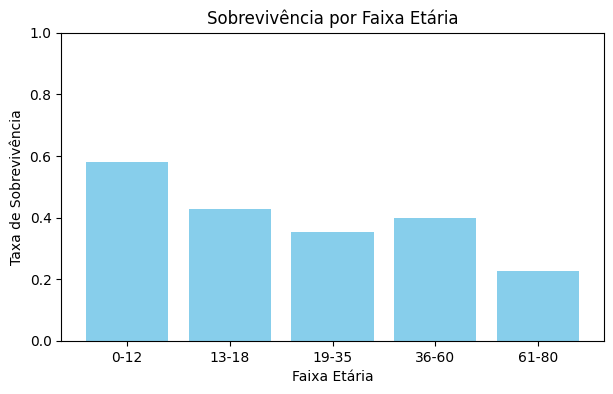


Taxa de sobrevivência por faixa etária:
  AgeGroup  Survived
0     0-12  0.579710
1    13-18  0.428571
2    19-35  0.353271
3    36-60  0.400000
4    61-80  0.227273


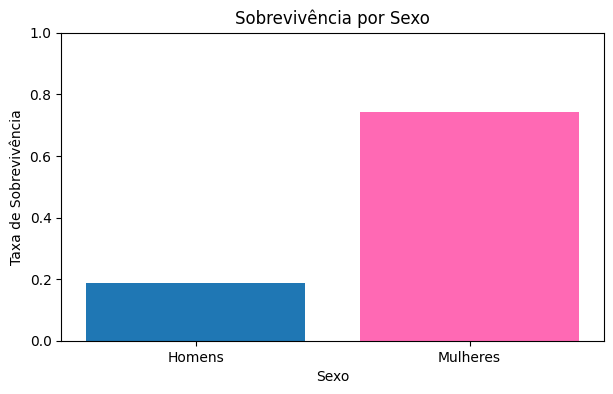


Taxa de sobrevivência por sexo:
        Sex  Survived
0    Homens  0.188908
1  Mulheres  0.742038


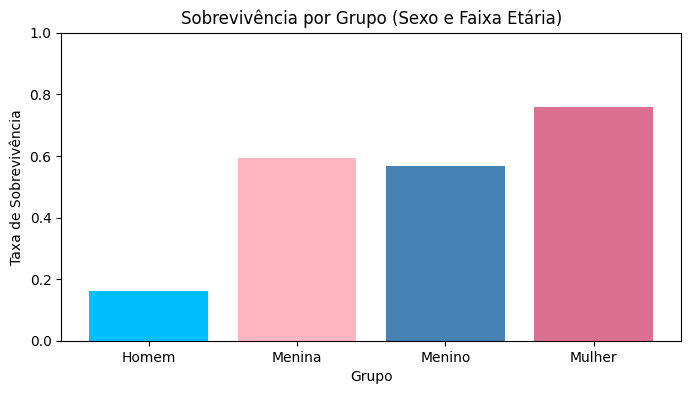


Taxa de sobrevivência por grupo (homens, mulheres, meninos, meninas):
    Group  Survived
0   Homem  0.162963
1  Menina  0.593750
2  Menino  0.567568
3  Mulher  0.758865


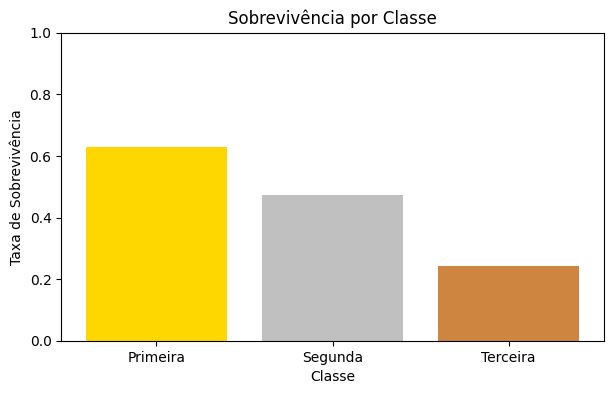


Taxa de sobrevivência por classe:
     Pclass  Survived
0  Primeira  0.629630
1   Segunda  0.472826
2  Terceira  0.242363


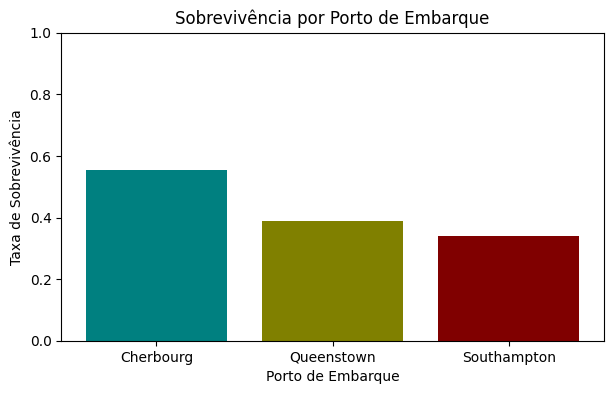


Taxa de sobrevivência por porto de embarque:
      Embarked  Survived
0    Cherbourg  0.553571
1   Queenstown  0.389610
2  Southampton  0.339009


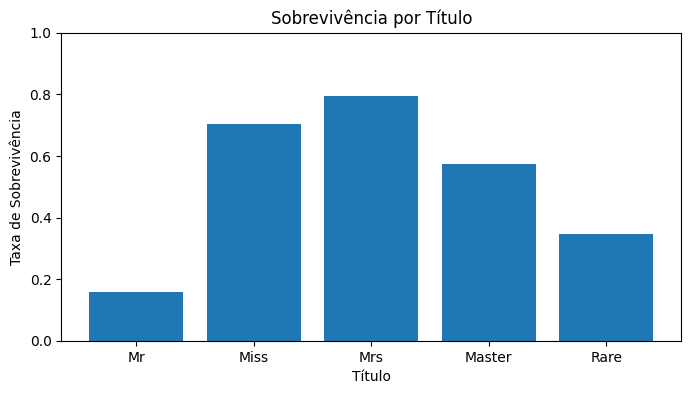


Taxa de sobrevivência por título:
    Title  Survived
0      Mr  0.156673
1    Miss  0.702703
2     Mrs  0.793651
3  Master  0.575000
4    Rare  0.347826


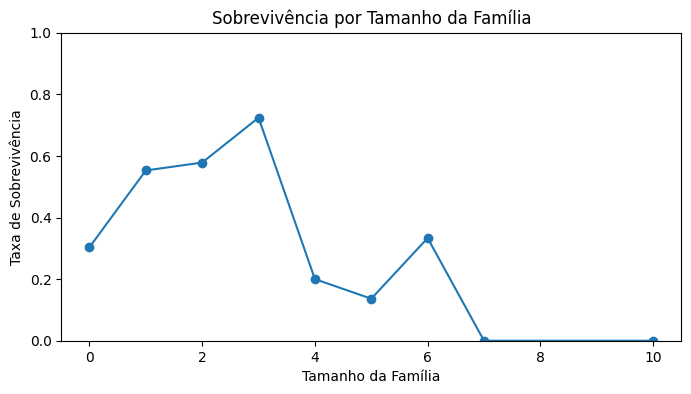


Taxa de sobrevivência por tamanho da família:
   FamilySize  Survived
0           0  0.303538
1           1  0.552795
2           2  0.578431
3           3  0.724138
4           4  0.200000
5           5  0.136364
6           6  0.333333
7           7  0.000000
8          10  0.000000


/tmp/ipykernel_35/27718199.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = train.groupby('FareGroup')['Survived'].mean().reset_index()


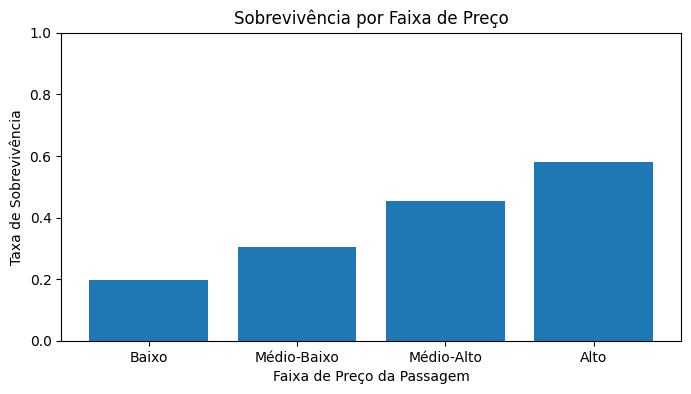


Taxa de sobrevivência por faixa de preço da passagem:
     FareGroup  Survived
0        Baixo  0.197309
1  Médio-Baixo  0.303571
2   Médio-Alto  0.454955
3         Alto  0.581081

Sobrevivência por classe e sexo:
          Homens  Mulheres
Pclass                    
1       0.368852  0.968085
2       0.157407  0.921053
3       0.135447  0.500000


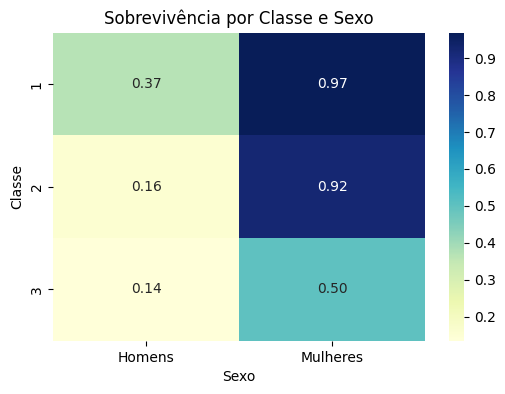


Acurácias dos modelos:
Random Forest:        0.8324
Logistic Regression:  0.7877
Decision Tree:        0.8045
K-Nearest Neighbors:  0.7877

Melhor modelo: Random Forest

Arquivo submission.csv gerado com sucesso!


In [ ]:
# Titanic Challenge - Kaggle Notebook Completo com Análises Exploratórias Avançadas


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1. Carregar os dados
train = pd.read_csv('/kaggle/input/titanic2/train.csv')
test = pd.read_csv('/kaggle/input/titanic2/test.csv')

# 2. Pré-processamento
for df in [train, test]:
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    le = LabelEncoder()
    df['Embarked'] = le.fit_transform(df['Embarked'])
    df['FamilySize'] = df['SibSp'] + df['Parch']
    df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    title_map = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
    df['Title'] = df['Title'].map(title_map).fillna(0)
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['0-12','13-18','19-35','36-60','61-80'])
    df['Child'] = (df['Age'] <= 12).astype(int)

# 3. Análise de sobrevivência por faixa etária
survival_by_age = train.groupby('AgeGroup')['Survived'].mean().reset_index()
plt.figure(figsize=(7,4))
plt.bar(survival_by_age['AgeGroup'].astype(str), survival_by_age['Survived'], color='skyblue')
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Faixa Etária')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por faixa etária:")
print(survival_by_age)

# 4. Análise de sobrevivência por sexo
survival_by_sex = train.groupby('Sex')['Survived'].mean().reset_index()
survival_by_sex['Sex'] = survival_by_sex['Sex'].map({0: 'Homens', 1: 'Mulheres'})
plt.figure(figsize=(7,4))
plt.bar(survival_by_sex['Sex'], survival_by_sex['Survived'], color=['#1f77b4', '#ff69b4'])
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Sexo')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por sexo:")
print(survival_by_sex)

# 5. Análise combinando sexo e criança/adulto
train['Group'] = train.apply(lambda row:
    'Menino' if row['Sex']==0 and row['Child']==1 else
    'Menina' if row['Sex']==1 and row['Child']==1 else
    'Homem' if row['Sex']==0 else 'Mulher', axis=1)

survival_by_group = train.groupby('Group')['Survived'].mean().reset_index()
plt.figure(figsize=(8,4))
plt.bar(survival_by_group['Group'], survival_by_group['Survived'], color=['#00bfff', '#ffb6c1', '#4682b4', '#db7093'])
plt.xlabel('Grupo')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Grupo (Sexo e Faixa Etária)')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por grupo (homens, mulheres, meninos, meninas):")
print(survival_by_group)

# 6. Análise de sobrevivência por Classe Social (Pclass)
survival_by_class = train.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_class['Pclass'] = survival_by_class['Pclass'].map({1: 'Primeira', 2: 'Segunda', 3: 'Terceira'})
plt.figure(figsize=(7,4))
plt.bar(survival_by_class['Pclass'], survival_by_class['Survived'], color=['gold', 'silver', 'peru'])
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Classe')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por classe:")
print(survival_by_class)

# 7. Análise de sobrevivência por Porto de Embarque (Embarked)
port_map = {0: 'Cherbourg', 1: 'Queenstown', 2: 'Southampton'}
survival_by_embarked = train.groupby('Embarked')['Survived'].mean().reset_index()
survival_by_embarked['Embarked'] = survival_by_embarked['Embarked'].map(port_map)
plt.figure(figsize=(7,4))
plt.bar(survival_by_embarked['Embarked'], survival_by_embarked['Survived'], color=['teal', 'olive', 'maroon'])
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Porto de Embarque')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por porto de embarque:")
print(survival_by_embarked)

# 8. Análise de sobrevivência por Título (Title)
title_map_inv = {1:'Mr', 2:'Miss', 3:'Mrs', 4:'Master', 5:'Rare', 0:'Outro'}
survival_by_title = train.groupby('Title')['Survived'].mean().reset_index()
survival_by_title['Title'] = survival_by_title['Title'].map(title_map_inv)
plt.figure(figsize=(8,4))
plt.bar(survival_by_title['Title'], survival_by_title['Survived'])
plt.xlabel('Título')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Título')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por título:")
print(survival_by_title)

# 9. Análise de sobrevivência por Tamanho da Família (FamilySize)
survival_by_family = train.groupby('FamilySize')['Survived'].mean().reset_index()
plt.figure(figsize=(8,4))
plt.plot(survival_by_family['FamilySize'], survival_by_family['Survived'], marker='o')
plt.xlabel('Tamanho da Família')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Tamanho da Família')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por tamanho da família:")
print(survival_by_family)

# 10. Análise de sobrevivência por Faixa de Preço da Passagem (Fare em quartis)
train['FareGroup'] = pd.qcut(train['Fare'], 4, labels=['Baixo', 'Médio-Baixo', 'Médio-Alto', 'Alto'])
survival_by_fare = train.groupby('FareGroup')['Survived'].mean().reset_index()
plt.figure(figsize=(8,4))
plt.bar(survival_by_fare['FareGroup'], survival_by_fare['Survived'])
plt.xlabel('Faixa de Preço da Passagem')
plt.ylabel('Taxa de Sobrevivência')
plt.title('Sobrevivência por Faixa de Preço')
plt.ylim(0,1)
plt.show()
print("\nTaxa de sobrevivência por faixa de preço da passagem:")
print(survival_by_fare)

# 11. Análise de sobrevivência por Classe + Sexo
pivot = pd.pivot_table(train, values='Survived', index='Pclass', columns='Sex')
pivot.columns = ['Homens', 'Mulheres']
print("\nSobrevivência por classe e sexo:")
print(pivot)
plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.xlabel('Sexo')
plt.ylabel('Classe')
plt.title('Sobrevivência por Classe e Sexo')
plt.show()

# 12. Seleção de features para o modelo
features = ['Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'AgeGroup', 'Child']
X = train[features].copy()
X['AgeGroup'] = X['AgeGroup'].cat.codes # converter para numérico
X = X.fillna(0)
y = train['Survived']
X_test = test[features].copy()
X_test['AgeGroup'] = X_test['AgeGroup'].cat.codes
X_test = X_test.fillna(0)

# 13. Divisão treino/validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 14. Comparação de Modelos

# a) Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
rf_acc = accuracy_score(y_val, rf_pred)

# b) Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)
lr_acc = accuracy_score(y_val, lr_pred)

# c) Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)
dt_acc = accuracy_score(y_val, dt_pred)

# d) K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_val)
knn_acc = accuracy_score(y_val, knn_pred)

print('\nAcurácias dos modelos:')
print(f'Random Forest:        {rf_acc:.4f}')
print(f'Logistic Regression:  {lr_acc:.4f}')
print(f'Decision Tree:        {dt_acc:.4f}')
print(f'K-Nearest Neighbors:  {knn_acc:.4f}')

# 15. Escolher o melhor modelo
accs = [rf_acc, lr_acc, dt_acc, knn_acc]
models = [rf, lr, dt, knn]
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree', 'KNN']
melhor_modelo = models[np.argmax(accs)]
print(f'\nMelhor modelo: {model_names[np.argmax(accs)]}')

# 16. Treinar o melhor modelo em todos os dados de treino
melhor_modelo.fit(X, y)
test_pred = melhor_modelo.predict(X_test)

# 17. Gerar arquivo de submissão para Kaggle
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_pred
})
submission.to_csv('submission.csv', index=False)
print('\nArquivo submission.csv gerado com sucesso!')
